In [1]:
# importação das bibliotecas

import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 

In [2]:
data = pd.read_csv('single_family_home_values.csv')

In [3]:
data.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
data.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [6]:
X = data.drop('estimated_value', axis = 1)

In [7]:
X= X[['bedrooms', 'bathrooms',  'rooms', 'squareFootage','lotSize', 'yearBuilt', 'priorSaleAmount']]

In [8]:
X.fillna(0, inplace=True)

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [10]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [11]:
labels= kmeans.labels_

In [12]:
kmeans.cluster_centers_[0]

array([3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
       6.97174968e+03, 1.94200506e+03, 7.43586930e+05])

In [13]:
X['cluster'] = labels

In [14]:
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.0,4.0,8.0,2582.0,6250.0,1927.0,651500.0
1,2.0,2.0,5.0,1133.0,6236.5,1928.5,0.0
2,3.0,4.5,9.0,3748.0,8597.5,1998.0,13750055.0
3,4.0,6.0,10.0,4424.0,8580.0,1989.0,2200000.0
4,3.0,2.0,6.0,1327.0,5210.0,1923.0,279900.0


In [15]:
X= X.drop('cluster', axis=1)

In [16]:
from  sklearn.metrics import silhouette_score

In [17]:
for i in range(3, 10):
    kmeans=KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print(silhouette_score(X,  labels))

0.6145561996874052
0.6167477265059356
0.6336214358394341
0.643438596521382
0.6577290412370432
0.660940918441709
0.6572097516760536


In [18]:
# Section 2.2 Classification and regression

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:
X.head()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
0,3,2.0,6,1378,9968,2003.0,165700.0
1,2,2.0,6,1653,6970,2004.0,0.0
2,3,1.0,0,1882,23875,1917.0,0.0
3,4,3.0,0,2400,11500,1956.0,0.0
4,3,4.0,8,2305,5600,1998.0,0.0


In [21]:
y=data.estimated_value 

In [22]:
lg = LinearRegression()
lg.fit(X,y) #training 
lg.score(X,y) 

0.7648477834199695

In [23]:
X_train, X_test,  y_train, y_test= train_test_split(X,y)

In [24]:
X_train.shape, y_train.shape 

((11250, 7), (11250,))

In [25]:
lg = LinearRegression()
lg.fit(X_train,y_train) # training , fit 
lg.score(X_test,y_test) # evaluate , score, R2 

0.7748440954291836

In [26]:
data['estimated_value_bins']=data.estimated_value.apply(lambda x: 'high' if x> 500000 else 'low')

In [27]:
data.estimated_value_bins.value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [29]:
y2= data.estimated_value_bins

In [30]:
log = LogisticRegression() 

In [31]:
X_train, X_test,  y2_train, y2_test= train_test_split(X,y2)

In [32]:
log.fit(X_train, y2_train)

LogisticRegression()

In [33]:
log.score(X_test, y2_test)

0.8192

In [34]:
y_pred = log.predict(X_test) 

In [35]:
np.array(y2_test)

array(['low', 'high', 'high', ..., 'high', 'high', 'high'], dtype=object)

In [36]:
confusion_matrix(y2_test,y_pred )

array([[1602,  381],
       [ 297, 1470]], dtype=int64)

In [37]:
# SVM

In [38]:
svr= SVR() 
svr.fit(X_train, y_train)
svr.score(X_test, y_test) 

-0.06165535241522635

In [39]:
svc= SVC() 
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test) 

0.7034666666666667

In [40]:
y2_pred=svc.predict(X_test)

In [41]:
confusion_matrix(y2_test, y2_pred)

array([[1031,  952],
       [ 160, 1607]], dtype=int64)

In [42]:
knn= KNeighborsRegressor()

In [43]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
knn.score(X_test, y_test)

-0.2313946699986471

In [45]:
knn= KNeighborsClassifier()

In [46]:
knn.fit(X_train, y2_train)

KNeighborsClassifier()

In [47]:
knn.score(X_test,y2_test) 

0.8224

In [48]:
y2_pred=knn.predict(X_test)

In [49]:
confusion_matrix(y2_test, y2_pred)

array([[1618,  365],
       [ 301, 1466]], dtype=int64)

In [ ]:
# Section 2.3 Association and correlation

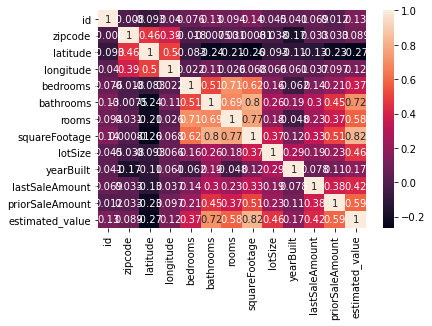

In [56]:
sns.heatmap(data.corr(), annot=True);